In [2]:
%matplotlib inline

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import random

In [37]:
def dist(x, y):
    return np.sqrt(sum(abs(x-y)**2))

In [46]:
def avg_dist(dim, n):
    points = np.random.uniform(size=(n, dim))
    # print(points)
    return [dist(x, y) for x,y in combinations(points, 2)]
    

(array([  6.20000000e+01,   6.31000000e+02,   3.47500000e+03,
          1.03230000e+04,   1.53770000e+04,   1.06780000e+04,
          3.62900000e+03,   6.25000000e+02,   4.80000000e+01,
          2.00000000e+00]),
 array([ 1.61626408,  1.8279182 ,  2.03957232,  2.25122643,  2.46288055,
         2.67453467,  2.88618879,  3.0978429 ,  3.30949702,  3.52115114,
         3.73280526]),
 <a list of 10 Patch objects>)

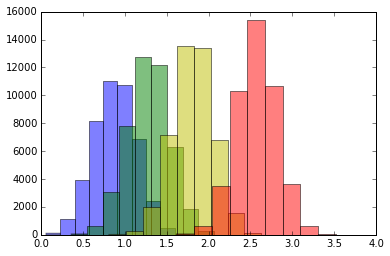

In [53]:
plt.hist(avg_dist(5, 300), color='b', alpha=0.5); plt.hist(avg_dist(10, 300), color='g', alpha=0.5); plt.hist(avg_dist(20, 300), color='y', alpha=0.5); plt.hist(avg_dist(40, 300), color='r', alpha=0.5)

The average distance between any two points is rather going up, so why did the professor said that any two points are harder to distinguish in kNN?

Okay, the wikipedia article says that the ratio to nearest point to the fartest point decreases, what I can do is take 10 random points, take distance from every other point, take average and plot the distribution

In [73]:
points = np.random.uniform(size=(n, dim))
random.sample(points, 5)

[array([ 0.59379664,  0.6814134 ,  0.1410733 ,  0.59538507,  0.88003916]),
 array([ 0.28201151,  0.3316525 ,  0.64449708,  0.85374408,  0.83368782]),
 array([ 0.04504877,  0.74018673,  0.72565317,  0.28088308,  0.65725525]),
 array([ 0.74424945,  0.55976872,  0.80842772,  0.36826697,  0.64305647]),
 array([ 0.41693764,  0.79605819,  0.46381505,  0.48339377,  0.86176544])]

In [71]:
np.random.choice?

In [74]:
def distance_distribution(dim, n, k):
    points = np.random.uniform(size=(n, dim))
    k_p = random.sample(points, k)
    distri = np.zeros(n)
    for p in k_p:
        distances = [dist(x, p) for x in points]
        distances.sort()
        distri = distri + np.array(distances)
    return distri/k    

dim: 4, ratio: 0.124871715705
dim: 8, ratio: 0.287808277623
dim: 16, ratio: 0.417622276949
dim: 32, ratio: 0.56230793566
dim: 64, ratio: 0.665390131417
dim: 128, ratio: 0.756480470906


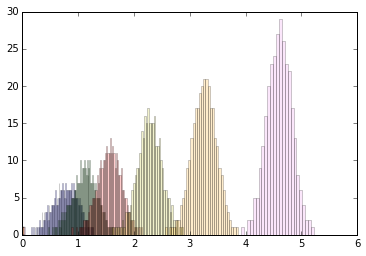

In [85]:
for d, c in zip([4, 8, 16, 32, 64, 128], ['b', 'g', 'r', 'y', 'orange', 'violet']):
    distri = distance_distribution(d, 300, 20)
    plt.hist(distri, bins=100, alpha=0.2, color=c)
    print("dim: {}, ratio: {}".format(d, distri[1]/distri[-1]))

As we increase the dimention, the ratio between the nearest point and the farthest point approaches 1, that means it becomes harder and harder to distinguish between them using only distance. Distnace looses its "usefullness" has the number of dimentions increases.